In [1]:
import numpy as np
import pandas as pd
import polars as pl
import os
import time
from glob2 import glob
import matplotlib.pyplot as plt

In [2]:
## create dataframe for package performance data
time_df = pd.DataFrame(columns=['benchmark', 'pandas time', 'polars time'])
time_df['benchmark'] = ['write_csv', 'read_csv', 'select_columns', 'filter_rows', 'sort_rows', 'fill_na', 'calc_stats']
time_df['pandas time'] = np.nan
time_df['polars time'] = np.nan

In [3]:
## comparison of dataframes writing
print('Comparison of dataframes writing')

# create directory to store dataframes
if not os.path.exists('./random_dataframe/'):
  os.mkdir('./random_dataframe/')

# generate dataframs using pandas
start = time.perf_counter()
columns = [f'{i}' for i in range(1000)]
for i in range(10):
  array = np.random.rand(10000,1000) + i * 100
  df = pd.DataFrame(array, columns=columns)
  df.to_csv(f'./random_dataframe/{i+1}.csv')
end = time.perf_counter()
print(f'Pandas Time: {end - start} seconds')
time_df.loc[0, 'pandas time'] = end - start

# generate dataframs using polars
start = time.perf_counter()
columns = [f'{i}' for i in range(1000)]
for i in range(10):
  array = np.random.rand(10000,1000) + i * 100
  df = pl.DataFrame(array, schema=columns)
  df.write_csv(f'./random_dataframe/{i+11}.csv')
end = time.perf_counter()
print(f'Polars Time: {end - start} seconds')
time_df.loc[0, 'polars time'] = end - start

Comparison of dataframes writing
Pandas Time: 68.47109769999952 seconds
Polars Time: 2.4320810999997775 seconds


In [4]:
## comparison of dataframes reading
print('Comparison of dataframes reading')

# read dataframes using pandas
start = time.perf_counter()
for i in range(20):
  df = pd.read_csv(f'./random_dataframe/{i+1}.csv')
end = time.perf_counter()
print(f'Pandas Time: {end - start} seconds')
time_df.loc[1, 'pandas time'] = end - start

# read dataframes using polars
start = time.perf_counter()
for i in range(20):
  df = pl.read_csv(f'./random_dataframe/{i+1}.csv')
end = time.perf_counter()
print(f'Polars Time: {end - start} seconds')
time_df.loc[1, 'polars time'] = end - start

Comparison of dataframes reading
Pandas Time: 18.033977799997956 seconds
Polars Time: 1.293282899998303 seconds


In [5]:
## comparison of select columns
print('Comparison of select columns')

# read dataframes using polars
df_dict_pl = {}
df_dict_pd = {}
for i in range(20):
  df_pl = pl.read_csv(f'./random_dataframe/{i+1}.csv')
  df_dict_pl[i] = df_pl
  df_pd = df_pl.to_pandas()
  df_dict_pd[i] = df_pd

# select columns using pandas
start = time.perf_counter()
for i in range(20000):
  df = df_dict_pd[i%20]
  df = df[['0','1','2','3','4']]
end = time.perf_counter()
print(f'Pandas Time: {end - start} seconds')
time_df.loc[2, 'pandas time'] = end - start

# select columns using polars
start = time.perf_counter()
for i in range(20000):
  df = df_dict_pl[i%20]
  df = df.select(['0','1','2','3','4'])
end = time.perf_counter()
print(f'Polars Time: {end - start} seconds')
time_df.loc[2, 'polars time'] = end - start

Comparison of select columns
Pandas Time: 2.6878174000012223 seconds
Polars Time: 1.3185502999986056 seconds


In [6]:
## comparison of filter rows
print('Comparison of filter rows')

# read dataframes using polars
df_dict_pl = {}
df_dict_pd = {}
for i in range(20):
  df_pl = pl.read_csv(f'./random_dataframe/{i+1}.csv')
  df_dict_pl[i] = df_pl
  df_pd = df_pl.to_pandas()
  df_dict_pd[i] = df_pd

# filter rows using pandas
start = time.perf_counter()
for i in range(2000):
  df = df_dict_pd[i%20]
  df = df[df['0'] > 0.5]
end = time.perf_counter()
print(f'Pandas Time: {end - start} seconds')
time_df.loc[3, 'pandas time'] = end - start

# filter rows using polars
start = time.perf_counter()
for i in range(2000):
  df = df_dict_pl[i%20]
  df = df.filter(df['0'] > 0.5)
end = time.perf_counter()
print(f'Polars Time: {end - start} seconds')
time_df.loc[3, 'polars time'] = end - start

Comparison of filter rows
Pandas Time: 20.69887430000381 seconds
Polars Time: 1.9661064000029 seconds


In [7]:
## comparison of sort rows
print('Comparison of sort rows')

# read dataframes using polars
df_dict_pl = {}
df_dict_pd = {}
for i in range(20):
  df_pl = pl.read_csv(f'./random_dataframe/{i+1}.csv')
  df_dict_pl[i] = df_pl
  df_pd = df_pl.to_pandas()
  df_dict_pd[i] = df_pd

# sort rows using pandas
start = time.perf_counter()
for i in range(200):
  df = df_dict_pd[i%20]
  df = df.sort_values(by='0')
end = time.perf_counter()
print(f'Pandas Time: {end - start} seconds')
time_df.loc[4, 'pandas time'] = end - start

# sort rows using polars
start = time.perf_counter()
for i in range(200):
  df = df_dict_pl[i%20]
  df = df.sort('0')
end = time.perf_counter()
print(f'Polars Time: {end - start} seconds')
time_df.loc[4, 'polars time'] = end - start

Comparison of sort rows
Pandas Time: 5.450892100001511 seconds
Polars Time: 1.174701100004313 seconds


In [8]:
## comparison of fill na
print('Comparison of fill na')

# read dataframes using polars
df_dict_pl = {}
df_dict_pd = {}
for i in range(20):
  df_pl = pl.read_csv(f'./random_dataframe/{i+1}.csv')
  df_dict_pl[i] = df_pl
  df_pd = df_pl.to_pandas()
  df_dict_pd[i] = df_pd

# create random nulls
for i in range(20):
  df_pd = df_dict_pd[i]
  df_pl = df_dict_pl[i]
  for j in range(1000):
    indexes = np.random.randint(0,10000,100)
    df_pd.loc[indexes,f'{j}'] = np.nan
    df_pl[indexes, f'{j}'] = np.nan
  df_dict_pd[i] = df_pd
  df_dict_pl[i] = df_pl

# fill nulls using pandas
start = time.perf_counter()
for i in range(200):
  df = df_dict_pd[i%20]
  df = df.fillna(0)
end = time.perf_counter()
print(f'Pandas Time: {end - start} seconds')
time_df.loc[5, 'pandas time'] = end - start

# fill nulls using polars
start = time.perf_counter()
for i in range(200):
  df = df_dict_pl[i%20]
  df = df.fill_null(0)
end = time.perf_counter()
print(f'Polars Time: {end - start} seconds')
time_df.loc[5, 'polars time'] = end - start

Comparison of fill na
Pandas Time: 4.529551200001151 seconds
Polars Time: 0.7351737999997567 seconds


In [9]:
## comparison of calculate dataframes statistics
print('Comparison of calculate dataframes statistics')

# read dataframes using polars
df_dict_pl = {}
df_dict_pd = {}
for i in range(20):
  df_pl = pl.read_csv(f'./random_dataframe/{i+1}.csv')
  df_dict_pl[i] = df_pl
  df_pd = df_pl.to_pandas()
  df_dict_pd[i] = df_pd

# calculate dataframes statistics using pandas
start = time.perf_counter()
for i in range(20):
  df = df_dict_pd[i%20]
  df.mean()
  df.var()
  df.std()
  df.sum()
  df.max()
  df.min()
  df.median()
  df.quantile(0.25)
  df.quantile(0.75)
end = time.perf_counter()
print(f'Pandas Time: {end - start} seconds')
time_df.loc[6, 'pandas time'] = end - start

# calculate dataframes statistics using polars
start = time.perf_counter()
for i in range(20):
  df = df_dict_pl[i%20]
  df.mean()
  df.var()
  df.std()
  df.sum()
  df.max()
  df.min()
  df.median()
  df.quantile(0.25)
  df.quantile(0.75)
end = time.perf_counter()
print(f'Polars Time: {end - start} seconds')
time_df.loc[6, 'polars time'] = end - start

Comparison of calculate dataframes statistics
Pandas Time: 6.443044399995415 seconds
Polars Time: 0.5910871000014595 seconds


In [10]:
## delete generated csv
csv_files = glob('./random_dataframe/*.csv')
for file in csv_files:
  os.remove(file)
os.rmdir('./random_dataframe/')

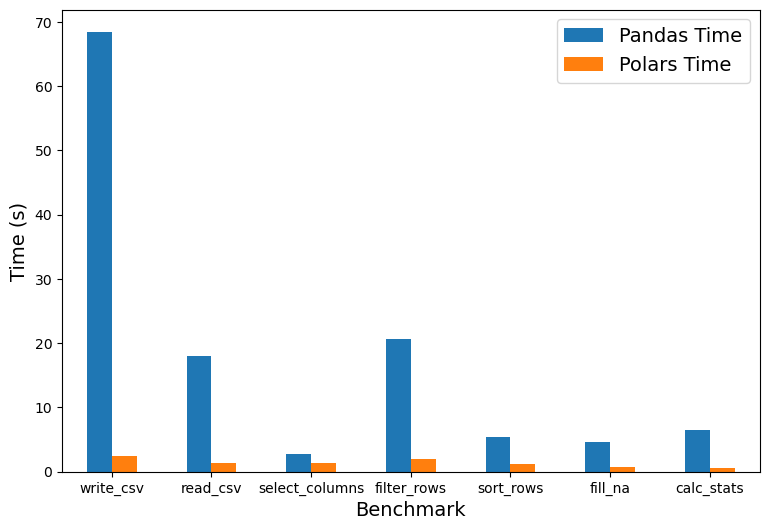

In [27]:
## plot performance comparison
time_df.plot(x='benchmark', y=['pandas time', 'polars time'], kind='bar', figsize=(9,6), rot=0)
plt.ylabel('Time (s)', fontsize=14)
plt.xlabel('Benchmark', fontsize=14)
plt.legend(['Pandas Time', 'Polars Time'], fontsize=14)
plt.savefig('./performance_comparison.png', dpi=600, bbox_inches='tight')
plt.show()